<a href="https://colab.research.google.com/github/FranklineMisango/Python_For_Finance_Bitcoin_Challenge_Repo/blob/main/Python_For_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import math as m
import numpy as np
import numpy_financial as npf
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [16]:
#price for 2018-2021
bitcoin = [3869.47, 7188.46, 22203.31, 29391.78]
#First requirement : standard deviation for the bitcoin from 2018 - 2021
print(np.std(bitcoin))

10513.803224771947


You decide to start a Bitcoin mining business in January of 2017. You make an initial investment of $500K to buy the required mining hardware.
Each year the hardware can mine 10 bitcoins, so your first return will come on January 1, 2018.

Hint

Create an array with the initial investment as the first element (with a negative value), followed by the cost of 10 bitcoins per year -- multiply the values of the given array by 10 and accordingly add them to the list you created, placing them after the investment value.


In [17]:
# Task : Calculate the return for each year and output the IRR of the project.
cashflow = [-500000, bitcoin[0]*10, bitcoin[1]*10, bitcoin[2]*10, bitcoin[3]*10]
print(npf.irr(cashflow))


0.07297215919675315


Let's continue with our Bitcoin calculations.
You decide to invest $1000 

in Bitcoin in 2018, at the price in the declared array: $3869.47.

Hint
First, calculate how many Bitcoins you will have at the start by dividing your investment by the cost of Bitcoin in the first year (the first element of the given array). Then multiply the entire array of the prices by that number to get the value for each year. Use np.multiply(array, number) to multiply an array with a number.


[1000.         1857.73762298 5738.07524028 7595.81544759]


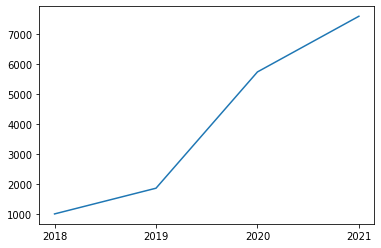

In [18]:
# Tasks
# Calculate how much your investment is worth at the end of each year using the prices denoted in the code.
# Draw a chart to showcase how much your $1000 investment changes in value each year.

import matplotlib.pyplot as plt
start = 1000 / bitcoin[0]
values = np.multiply(bitcoin, start)
print(values)
years = ['2018', '2019', '2020', '2021']
plt.plot(years, values)
plt.savefig('plot.png')

In [19]:

print(npf.fv(rate=0, nper=3, pmt=0, pv=-100))

100.0


/usr/local/lib/python3.7/dist-packages/numpy_financial/_financial.py:130: RuntimeWarning: invalid value encountered in long_scalars
  (1 + rate*when)*(temp - 1)/rate)


Time to get some real data!
The Bitcoin price can be found on Yahoo Finance using the ticker 'BTC-USD'.


Hint
Replace your code and set it up for the data you get from Yahoo Finance -- you don't need to work with the initial array you were given at the start of the project.
Here is an example of how you should get your data as an array:

import yfinance as yf

Date
2021-07-31    41626.195312
2021-08-01    39974.894531
2021-08-02    39201.945312
2021-08-03    38152.980469
2021-08-04    39747.503906
                  ...     
2022-07-27    22930.548828
2022-07-28    23843.886719
2022-07-29    23804.632812
2022-07-30    23656.207031
2022-07-31    23797.673828
Name: Close, Length: 366, dtype: float64


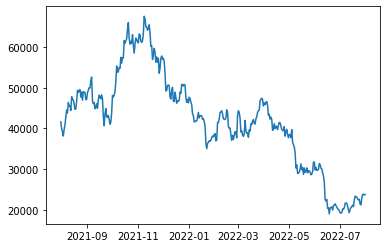

In [14]:
data = yf.Ticker('BTC-USD')
x = data.history('1y')['Close']
print(x)
plt.plot(x)
plt.savefig('plot.png')

Time to calculate important Bitcoin metrics!

[*********************100%***********************]  1 of 1 completed
Risk:  57.8634965901907
Sharpe:  -1.1424583860239668


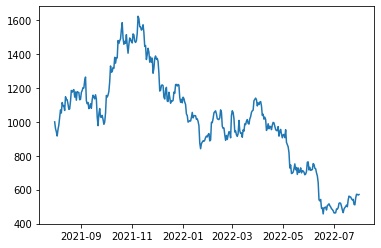

In [24]:
#1. Calculate the volatility of Bitcoin and output the risk %.
#2. Calculate and output the Sharpe ratio.

data = yf.Ticker('BTC-USD')
x = data.history('1y')['Close']

#Daily returns
d = yf.download('BTC-USD',start = '2022-01-01')
#Percentage change
pc = d['Close'].pct_change()
#Volatility
annual = np.std(pc)*np.sqrt(252)*100
print("Risk: ",annual)
sharpe = (np.mean(pc)/np.std(pc))*np.sqrt(252)
print("Sharpe: ",sharpe)

num_of_btc = 1000/x[0]
btc = np.multiply(x,num_of_btc)
plt.plot(btc)
plt.savefig('plot.png')